<a href="https://colab.research.google.com/github/SSakshi-sharma/Minor-Project/blob/main/Minor_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , roc_curve , roc_auc_score 
from sklearn import metrics

In [3]:
!pip install ipython-autotime
%load_ext autotime

time: 176 µs (started: 2021-06-23 08:04:36 +00:00)


In [4]:
diamonds = pd.read_csv('/content/diamonds.csv' , index_col = 0)


time: 65.3 ms (started: 2021-06-23 08:04:36 +00:00)


In [5]:
diamonds.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB
time: 18.5 ms (started: 2021-06-23 08:04:36 +00:00)


In [6]:
clarity = pd.get_dummies(diamonds['clarity'])
color = pd.get_dummies(diamonds['color'])

time: 11.9 ms (started: 2021-06-23 08:04:36 +00:00)


In [7]:
diamonds = pd.concat([diamonds , clarity , color] , axis = 1)


time: 8.12 ms (started: 2021-06-23 08:04:36 +00:00)


In [8]:
diamonds.drop(['color' , 'clarity'] , axis = 1 , inplace=True)


time: 11.8 ms (started: 2021-06-23 08:04:36 +00:00)


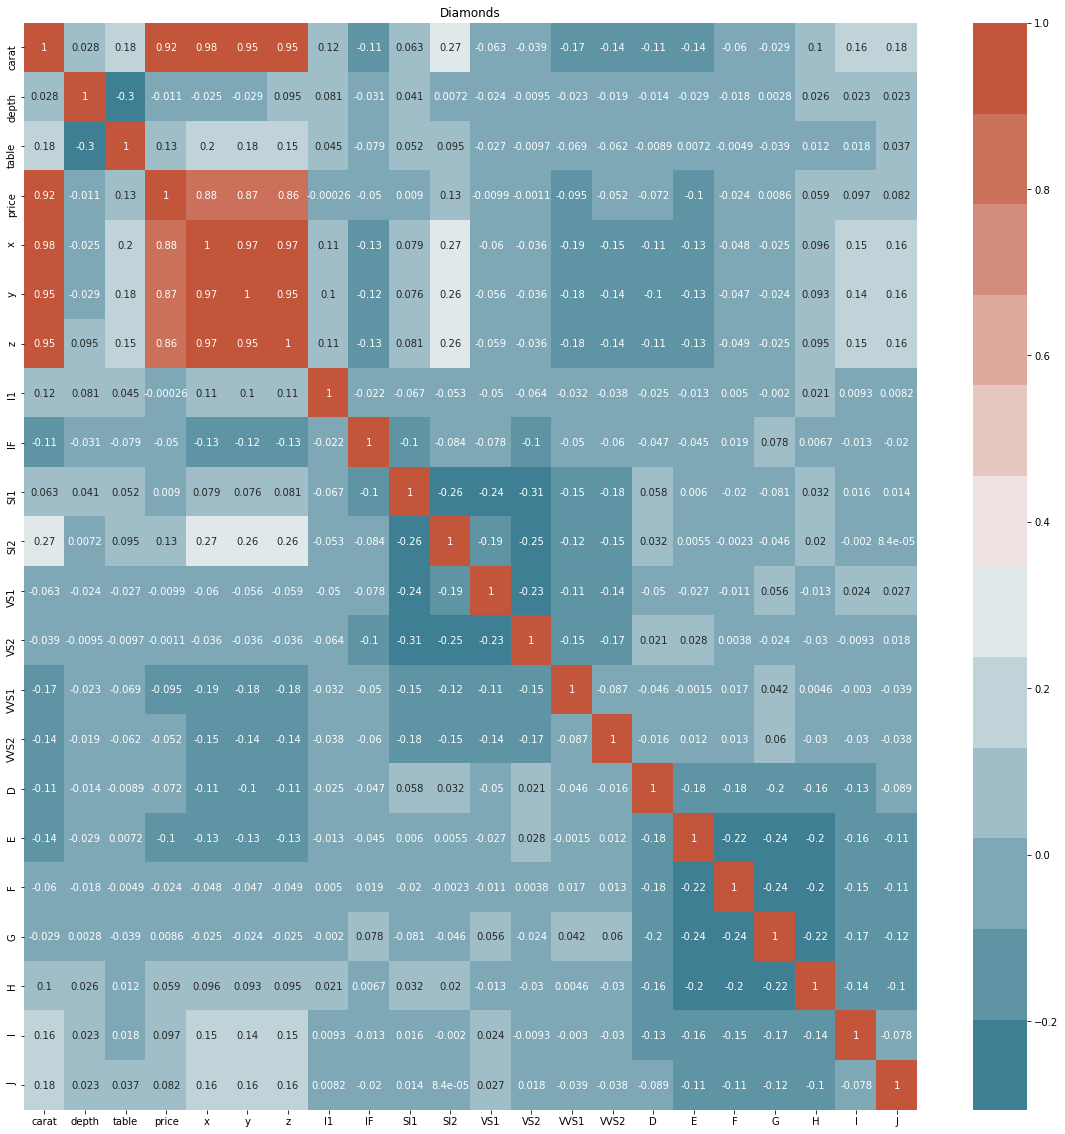

time: 1.89 s (started: 2021-06-23 08:04:36 +00:00)


In [9]:
plt.figure(figsize=(20, 20))
df_corr = diamonds.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.title("Diamonds")
plt.show()

In [10]:
diamonds['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

time: 11.9 ms (started: 2021-06-23 08:04:38 +00:00)


In [11]:
for i in range(len(diamonds)):
    if diamonds['cut'].iloc[i] == 'Ideal':
        diamonds['cut'].iloc[i] = 1
    if diamonds['cut'].iloc[i] == 'Premium':
        diamonds['cut'].iloc[i] = 2
    if diamonds['cut'].iloc[i] == 'Very Good':
        diamonds['cut'].iloc[i] = 3
    if diamonds['cut'].iloc[i] == 'Good':
        diamonds['cut'].iloc[i] = 4
    if diamonds['cut'].iloc[i] == 'Fair':
        diamonds['cut'].iloc[i] = 5
    #print('iloc number {}'.format(i))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


time: 14.7 s (started: 2021-06-23 08:04:38 +00:00)


In [12]:
diamonds.to_csv('/content/diamonds_ready_for_ML.csv' , index = False)

time: 348 ms (started: 2021-06-23 08:04:53 +00:00)


In [13]:
diamonds = pd.read_csv('/content/diamonds_ready_for_ML.csv')


time: 71.5 ms (started: 2021-06-23 08:04:53 +00:00)


In [14]:
X = diamonds.drop(['cut'], axis = 1 ).values
y = diamonds['cut'].values

time: 11.5 ms (started: 2021-06-23 08:04:53 +00:00)


In [15]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

time: 21 ms (started: 2021-06-23 08:04:53 +00:00)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X , y  , test_size = 0.2 , random_state = 42)

time: 15.5 ms (started: 2021-06-23 08:04:53 +00:00)


In [17]:
def calculate_and_plot_k_neighbors(X_train, X_test, y_train, y_test):
    
    neighbors = np.arange(1, 10)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    
    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors= k)
        knn.fit(X_train , y_train)
        train_accuracy[i] = knn.score(X_train, y_train)    
        test_accuracy[i] = knn.score(X_test, y_test)

    plt.figure(figsize=(10, 8))   
    plt.title('k in kNN analysis')
    plt.plot( neighbors , test_accuracy , label = 'Testing Accuracy')
    plt.plot(neighbors,train_accuracy ,label = 'Training Accuracy')
    plt.legend()
    plt.annotate('Best accuracy for this model with this k is {0:.2f} %'.format(max(test_accuracy) * 100), xy=(np.argmax(test_accuracy) + 1 , max(test_accuracy)), xytext=(5 , 0.80),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.show()

time: 14.4 ms (started: 2021-06-23 08:04:53 +00:00)


In [18]:
def plot_confusion_matrix(cf_matrix , y_test , model_type , cf_size):
    if cf_size == '2x2':
        group_names = ['True Negative','False Positive','False Negative','True Positive']
        group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
        labels = ['{}\n{}'.format(v1 ,v2) for v1, v2 in zip(group_names,group_counts)]
        labels = np.asarray(labels).reshape(2,2)
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            cf_matrix,
            annot = labels,
            cmap=sns.cubehelix_palette(100, as_cmap=True, hue=1, dark=0.30),
            fmt='',
            linewidths=1.5,
            vmin=0,
            vmax=len(y_test),
        )
        plt.title(model_type)
        plt.show()
    else:
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            cf_matrix / np.sum(cf_matrix) * 100,
            annot = True,
            cmap=sns.cubehelix_palette(100, as_cmap=True, hue=1, dark=0.30),
            fmt='.2f',
            linewidths=1.5,
            vmin=0,
            vmax=100,
        )
        plt.title(model_type)
        plt.show()

time: 13.2 ms (started: 2021-06-23 08:04:53 +00:00)


In [21]:
def LogisticRegression_algorithm(X_train, X_test, y_train, y_test):
    
    global y_pred_LG
    global LG_pipeline
    global y_prob_LG
    
    steps = [('scaler', StandardScaler()),
             ('LogisticRegression', LogisticRegression(random_state = 0))]
    
    LG_pipeline = Pipeline(steps)

    
    LG_pipeline.fit(X_train , y_train)
    
    y_pred_LG = LG_pipeline.predict(X_test)
    
    y_prob_LG = LG_pipeline.predict_proba(X_test)
    
    print("Accuracy: {0:.2f} %".format(LG_pipeline.score(X_test, y_test) * 100))
    print(classification_report(y_test, y_pred_LG))

time: 9.49 ms (started: 2021-06-23 08:04:53 +00:00)


In [22]:
#K-NN algorithm

time: 863 µs (started: 2021-06-23 08:04:53 +00:00)


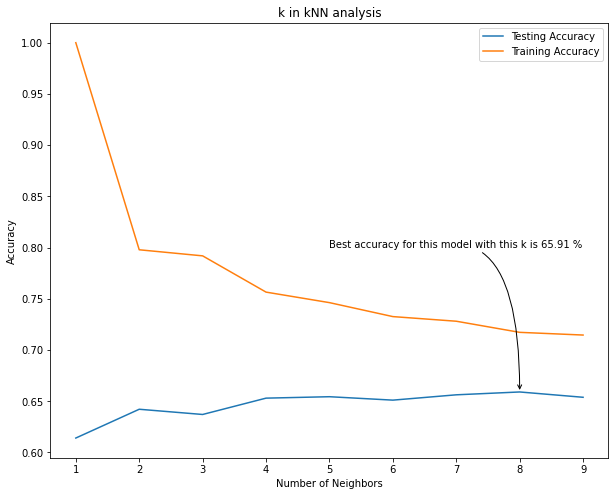

time: 1min 25s (started: 2021-06-23 08:04:53 +00:00)


In [23]:
calculate_and_plot_k_neighbors(X_train, X_test, y_train, y_test)

In [24]:
kNN_algorithm(X_train , y_train , X_test , y_test , 8)

              precision    recall  f1-score   support

           1       0.76      0.92      0.83      4292
           2       0.61      0.73      0.67      2775
           3       0.42      0.26      0.32      2382
           4       0.57      0.35      0.43      1004
           5       0.92      0.49      0.64       335

    accuracy                           0.66     10788
   macro avg       0.65      0.55      0.58     10788
weighted avg       0.63      0.66      0.63     10788

kNN algorithm acuracy is : 65.85 %
time: 5.21 s (started: 2021-06-23 08:06:19 +00:00)


In [25]:

cf_matrix_knn = confusion_matrix(y_test, y_pred_kNN)

time: 13.4 ms (started: 2021-06-23 08:06:24 +00:00)


In [26]:
cf_matrix_knn = pd.DataFrame(cf_matrix_knn  , index = ['Ideal' ,'Premium','Very Good','Good','Fair'] , columns =['Ideal','Premium','Very Good','Good','Fair'])

time: 2.55 ms (started: 2021-06-23 08:06:24 +00:00)


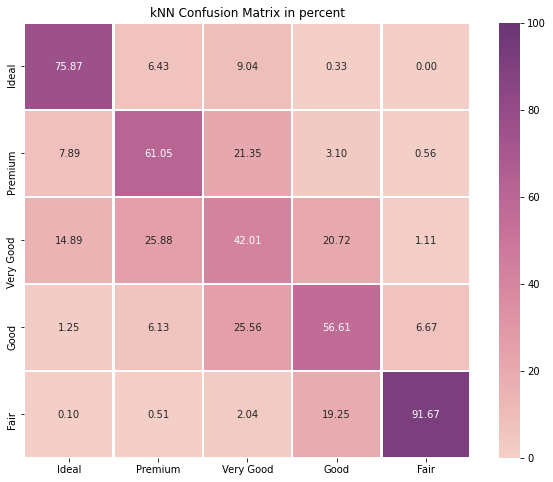

time: 279 ms (started: 2021-06-23 08:06:24 +00:00)


In [27]:
plot_confusion_matrix(cf_matrix_knn , y_test , 'kNN Confusion Matrix in percent' , '5x5')

In [ ]:
#LogisticRegression

In [30]:
LogisticRegression_algorithm(X_train, X_test, y_train, y_test)

Accuracy: 65.59 %
              precision    recall  f1-score   support

           1       0.72      0.87      0.79      4292
           2       0.66      0.72      0.69      2775
           3       0.50      0.44      0.47      2382
           4       0.56      0.13      0.21      1004
           5       0.76      0.48      0.59       335

    accuracy                           0.66     10788
   macro avg       0.64      0.53      0.55     10788
weighted avg       0.64      0.66      0.63     10788

time: 2.43 s (started: 2021-06-23 09:47:12 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
cf_matrix_LG = confusion_matrix(y_test, y_pred_LG)

time: 18.1 ms (started: 2021-06-23 09:47:18 +00:00)


In [32]:
cf_matrix_LG = pd.DataFrame(cf_matrix_LG  , index = ['Ideal' ,'Premium','Very Good','Good','Fair'] , columns =['Ideal','Premium','Very Good','Good','Fair'])

time: 2.19 ms (started: 2021-06-23 09:47:21 +00:00)


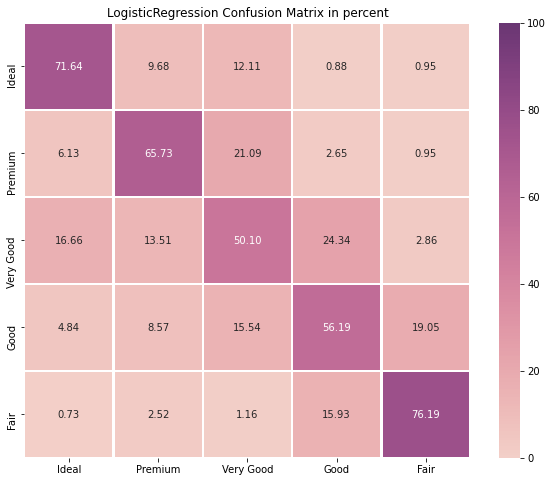

time: 267 ms (started: 2021-06-23 09:47:24 +00:00)


In [33]:
plot_confusion_matrix(cf_matrix_LG , y_test , 'LogisticRegression Confusion Matrix in percent' , '5x5')